In [1]:
from tools import vis

import json, imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
import base64
from PIL import Image

def from_base64(s):
    return Image.open(io.BytesIO(base64.b64decode(s)))

# Leaf
"Old School" Hand engineered features from image processing. Task is to identify the tree species from the picture of one of its leaves.

# Load the data
This data has an X and y like usual, but also base64 encoded RBG and black & white images for each instance.

In [3]:
with open('./processed/leaf.json') as fp:
    obj = json.load(fp)

    X = pd.DataFrame(**obj['X'])
    y = pd.Series(obj['y'], X.index)
    bw = pd.Series(data=obj['bw'], index=obj['X']['index'])

In [4]:
X.head()

,Specimen Number,Eccentricity,Aspect RatioElongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1.0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275
1,2.0,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075
2,3.0,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038
3,4.0,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066
4,5.0,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024


# Class Distribution

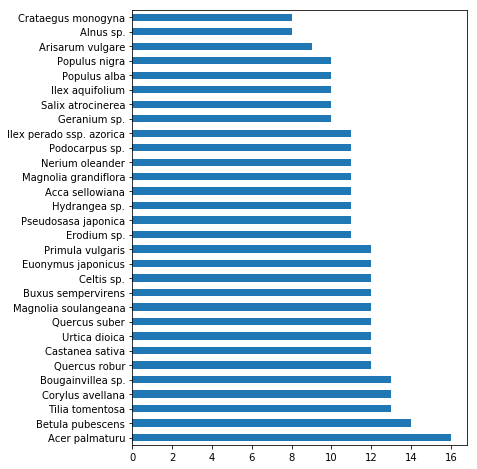

In [5]:
plt.figure(figsize=(6,8))
y.value_counts().plot.barh(color=plt.cm.tab10(0))

# Dimension Reduction
Uses z-score normalization

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

pos = pd.DataFrame(Pipeline([
    ('norm', StandardScaler()),
    ('proj', Isomap())
]).fit_transform(X), index=X.index)

# Visualize
Draw the black and white image of the leaf overlaid on the plot

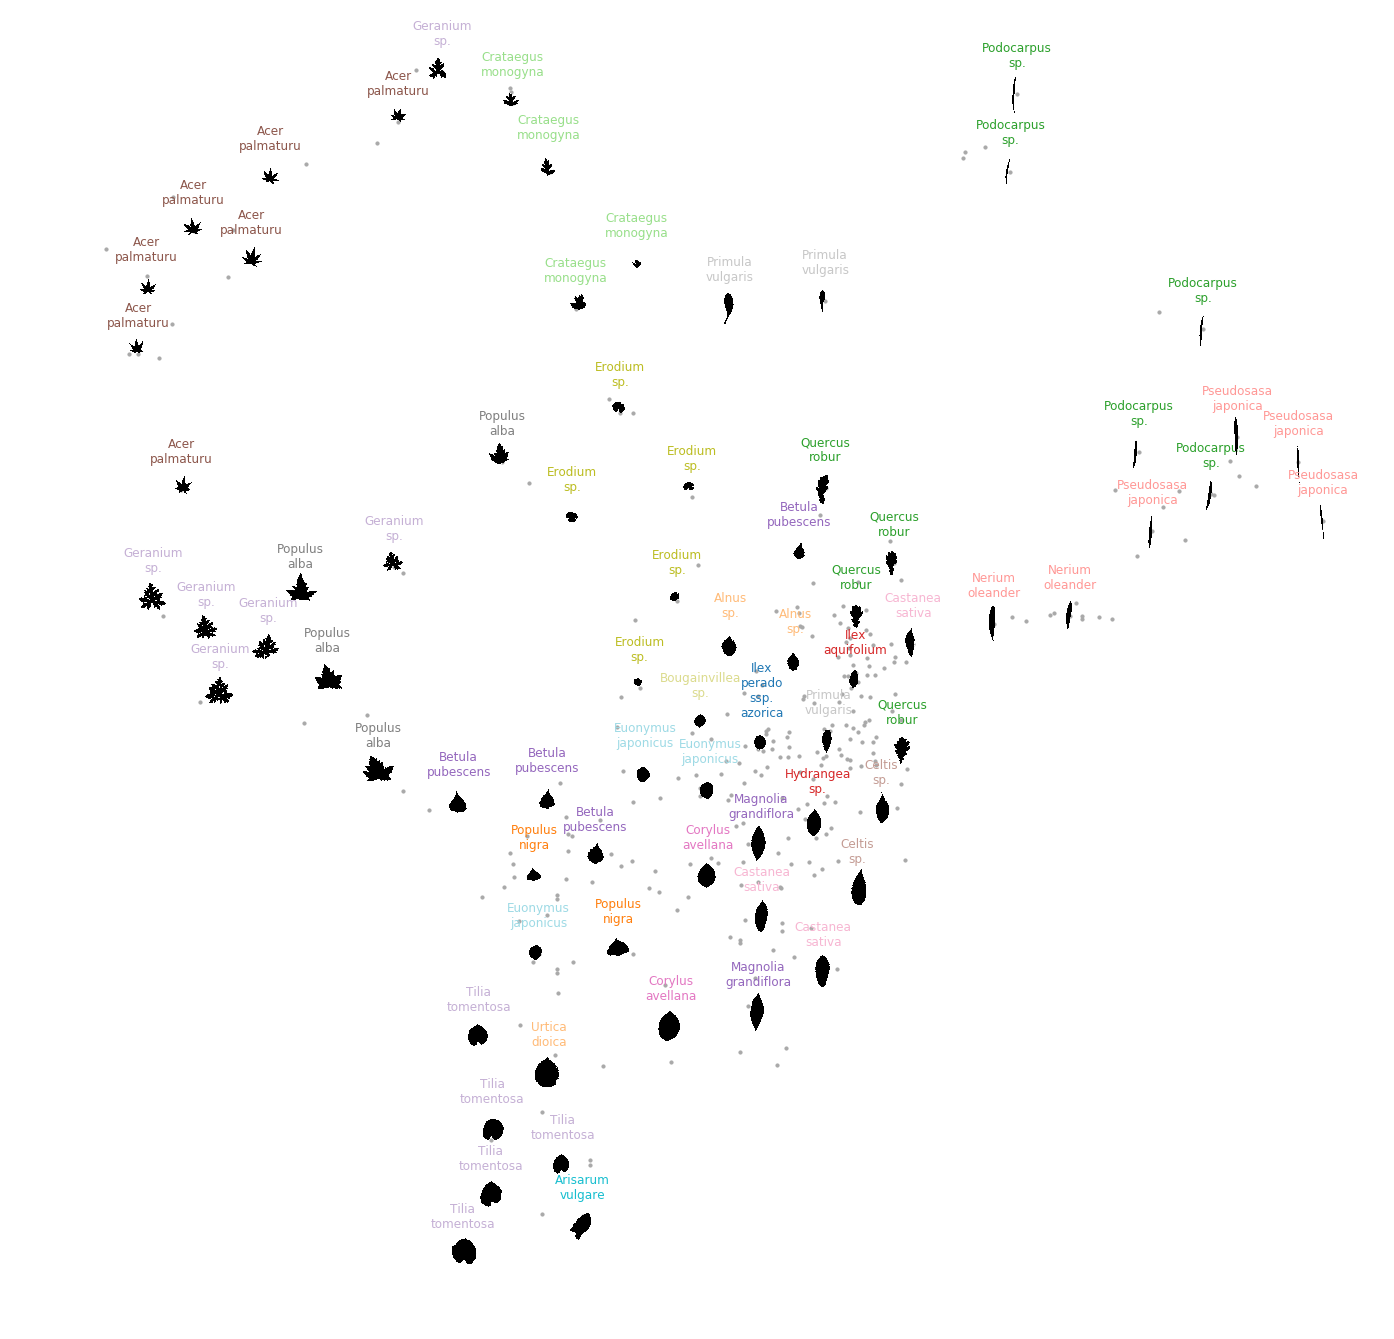

In [7]:
colors = {k: plt.cm.tab20(i%20) for i, k in enumerate(y.unique())}

plt.figure(figsize=(24, 24))
plt.axis('off')
for x, ax in vis.subplots_scatter(pos, s=.025):
    x0 = x[0]

    # convert the base64 string into a numpy array
    img = np.asarray(from_base64(bw.loc[x0]))

    # show the image as masked array so that the background is transparent
    ax.imshow(np.ma.masked_array(img, img == 0), cmap='binary', aspect='equal')
    
    # show the species of the leaf
    plt.title(y.loc[x0].replace(' ', '\n'), fontdict=dict(color=colors[y.loc[x0]]))
    plt.axis('off')

# ImageNet
Samples of data from the image net dataset of some (visually) confusable foods. Task is to identify the food type.

# Load the data
X and y like usual, but raw is a base64 encoded color image. X is 2K dimensional embedding vector taken from a deep network trained on the full ImageNet datset.

In [8]:
with open('./processed/imagenet.json') as fp:
    obj = json.load(fp)

    X = pd.DataFrame(**obj['X'])
    y = pd.Series(obj['y'], X.index)
    raw = pd.Series(data=obj['raw'], index=obj['X']['index'])

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
n07693725_25430,0.675609,0.376675,0.466404,0.113750,0.000000,1.260896,0.000000,0.069227,0.344207,0.109827,...,0.085952,0.435020,1.156094,0.087760,0.434627,0.000000,0.005111,0.000000,0.000000,0.000000
n07693725_5082,1.045965,1.538683,0.339993,0.664890,0.236341,1.015293,0.437909,0.000000,0.012601,0.751051,...,0.052024,0.502024,2.917682,0.342135,0.013902,0.392849,0.051608,0.000000,0.070056,0.039285
n07693725_1688,0.024139,0.206784,0.808505,0.000000,0.537369,0.000000,0.019907,0.068923,0.200856,0.200591,...,0.131459,0.053307,0.416720,0.000000,0.401849,0.138675,0.560486,0.072510,0.505086,0.379118
n07693725_8371,0.202635,0.405328,0.280213,0.024563,0.067731,0.000000,0.691145,0.298127,0.000000,0.449304,...,0.147908,0.004768,0.464411,0.190013,0.007850,0.307623,0.000000,0.009842,0.947828,2.164147
n07693725_9201,1.308008,0.491097,0.096954,0.177598,0.000000,0.128913,0.000000,0.000000,0.017546,0.770432,...,0.642683,0.092756,2.417132,0.039460,0.042653,0.000000,0.024572,0.006529,0.000986,0.024551


# Class Distribution

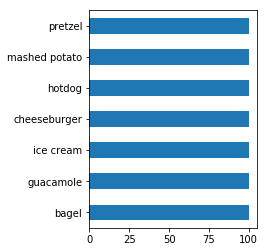

In [10]:
plt.figure(figsize=(3,4))
y.value_counts().plot.barh(color=plt.cm.tab10(0))

In [11]:
# here we don't create a pipeline because preprocessing is not necessary (or is it?)
pos = pd.DataFrame(Isomap().fit_transform(X), index=X.index)

# Visualize

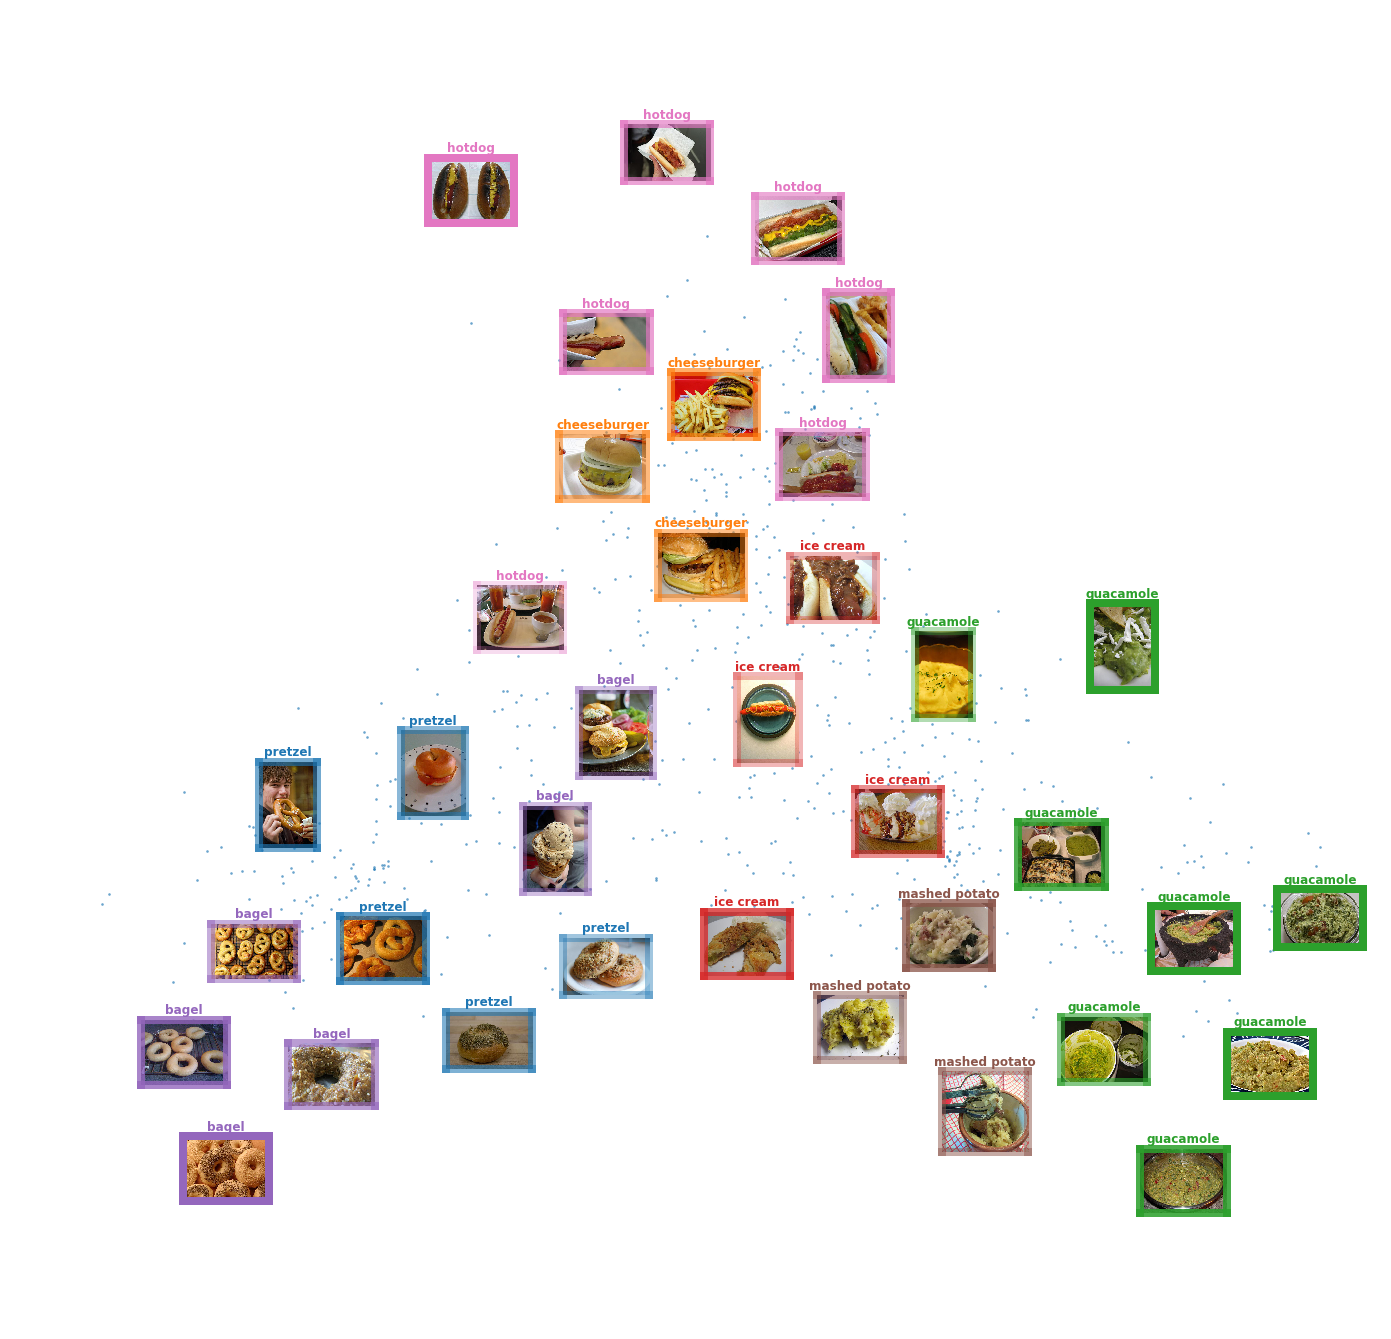

In [12]:
from sklearn.manifold import Isomap

colors = {v: plt.cm.tab10(i) for i,v in enumerate(set(y))}

plt.figure(figsize=(24, 24))
plt.axis('equal')
plt.axis('off')

for x, ax in vis.subplots_scatter(pos, scatter_args=dict(s=3, alpha=.5)):
    # show a single image
    img = from_base64(raw.loc[x[0]])
    ax.imshow(img)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # determine the color and purity of the border
    counts = y.loc[x].value_counts()
    c = counts.idxmax()
    p = counts[c]/counts.sum()        

    plt.title(c, fontdict=dict(color=colors[c], weight='bold'))

    for s in vis.each_spine(ax):
        s.set_linewidth(8)
        s.set_color(colors[c])
        s.set_alpha(p)

# Ideas for more exploration
* Explore classifier bias
    * Some classes may be easier to predict than others, e.g., by being very different
    * Can dimension reduction be used to give more attention to the harder classes?
* Do we need all 2K vectors?
    * Try feature selection
    * Try other dimension reduction techniques, but pick some arbitrary size like 30